In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np
from scipy.stats import linregress

# Study data files
csvpath = os.path.join('..', 'matplotlib', 'Mouse_metadata.csv')
csvpath2 = os.path.join('..', 'matplotlib', 'Study_results.csv')

# Read the mouse data and the study results
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        mouse_data = pd.DataFrame(csvreader, columns = ["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"])
with open(csvpath2) as csvfile:
    csvreader2 = csv.reader(csvfile, delimiter=',')
    for row in csvreader2:
        study_results = pd.DataFrame(csvreader2, columns = ["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"])
# Combine the data into a single dataset
mouse_data_result = pd.merge(mouse_data,study_results, on = "Mouse ID")
# Display the data table for preview
mouse_data_result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45,0
1,k403,Ramicane,Male,21,16,5,38.82589807,0
2,k403,Ramicane,Male,21,16,10,35.01427146,1
3,k403,Ramicane,Male,21,16,15,34.22399174,1
4,k403,Ramicane,Male,21,16,20,32.99772858,1


In [67]:
# Checking the number of mice
(len(mouse_data_result.iloc[:,0].unique()))

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_result[['Mouse ID']][mouse_data_result[['Mouse ID', 'Timepoint']].duplicated() == True]

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_result[mouse_data_result[['Mouse ID', 'Timepoint']].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45,0
911,g989,Propriva,Female,21,26,5,47.57039208,0
913,g989,Propriva,Female,21,26,10,49.8805278,0
915,g989,Propriva,Female,21,26,15,53.44201976,0
917,g989,Propriva,Female,21,26,20,54.65765008,1


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_unique = (mouse_data_result.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first'))

In [71]:
# Checking the number of mice in the clean DataFrame.
(len(mouse_data_unique.iloc[:,0].unique()))

249

## Summary Statistics

In [72]:
mouse_data_unique.loc[:,'Tumor Volume (mm3)'] = mouse_data_unique.loc[:,'Tumor Volume (mm3)'].astype("float")
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:  


C:\Users\toluw\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [73]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mouse_drug_reg = mouse_data_unique.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','std','var','sem']})
mouse_drug_regimen = mouse_drug_reg.rename(columns={"mean":"Mean","median":"Median","std":"Standard Deviation", 
                                                    "var":"Variance","sem": "SEM"})
# Assemble the resulting series into a single summary dataframe.
mouse_drug_regimen = mouse_drug_regimen.round(decimals=2)
mouse_drug_regimen

Tumor Volume (mm3)                                         
                           Mean Median Standard Deviation Variance   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56               4.99    24.95  0.33
Ceftamin                  52.59  51.78               6.27    39.29  0.47
Infubinol                 52.88  51.82               6.57    43.13  0.49
Ketapril                  55.24  53.70               8.28    68.55  0.60
Naftisol                  54.33  52.51               8.13    66.17  0.60
Placebo                   54.03  52.29               7.82    61.17  0.58
Propriva                  52.39  50.91               6.57    43.14  0.53
Ramicane                  40.22  40.67               4.85    23.49  0.32
Stelasyn                  54.23  52.43               7.71    59.45  0.57
Zoniferol                 53.24  51.82               6.97    48.53  0.52

## Bar and Pie Charts

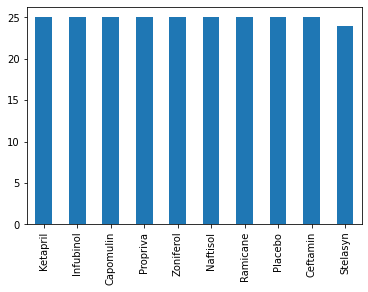

In [74]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_drug_reg = mouse_data_unique.groupby(['Drug Regimen','Mouse ID']).count().reset_index()
regiment_vs_mouse_count = mouse_drug_reg['Drug Regimen'].value_counts().plot(kind='bar');

([<matplotlib.axis.XTick at 0x1a0e82d0790>,
 [Text(0.15, 0, 'Ketapril'),
  Text(1.15, 0, 'Infubinol'),
  Text(2.15, 0, 'Capomulin'),
  Text(3.15, 0, 'Propriva'),
  Text(4.15, 0, 'Zoniferol'),
  Text(5.15, 0, 'Naftisol'),
  Text(6.15, 0, 'Ramicane'),
  Text(7.15, 0, 'Placebo'),
  Text(8.15, 0, 'Ceftamin'),
  Text(9.15, 0, 'Stelasyn')])

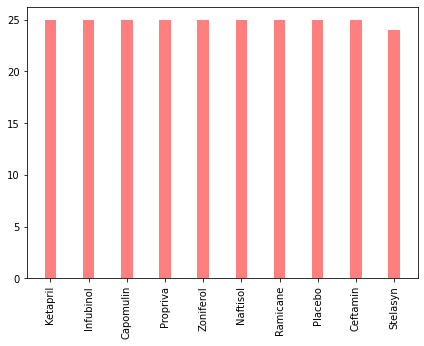

In [75]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Drur_reg_uni_cnt = pd.DataFrame(mouse_drug_reg.iloc[:,0].value_counts()).reset_index()
x_axis = np.arange(len(Drur_reg_uni_cnt))
tick_locations = [value+0.15 for value in x_axis]
plt.figure(figsize=(7,5))
plt.bar(x_axis, Drur_reg_uni_cnt["Drug Regimen"], color='r', alpha=0.5,width = 0.3, align="edge")
plt.xticks(tick_locations, Drur_reg_uni_cnt["index"], rotation="vertical")

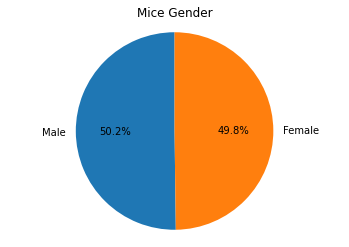

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_data_unique.groupby(['Mouse ID', 'Sex']).count().reset_index()
male_df = len(mouse_gender.loc[mouse_gender["Sex"] == "Male"])
female_df = len(mouse_gender.loc[mouse_gender["Sex"] == "Female"])
gender_count = [male_df,female_df]
gender = ['Male', 'Female']
plt.title('Mice Gender')
plt.pie(gender_count, labels=gender,
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

([<matplotlib.patches.Wedge at 0x1a0e9ce2e80>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

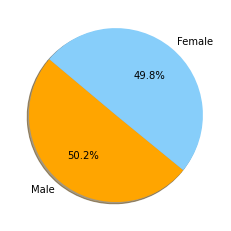

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["orange", "lightskyblue"]
plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
most_promising_regimen = mouse_data_result.loc[mouse_data_result['Drug Regimen'].isin(regimen)]
mouse_final_tumor_vol = (most_promising_regimen.drop_duplicates(subset=['Mouse ID'], keep='last'))
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_final_tumor_vol.loc[:,'Tumor Volume (mm3)'] = mouse_final_tumor_vol['Tumor Volume (mm3)'].astype("float")
mouse_final_tumor_vol.head()

C:\Users\toluw\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
vol_list = []
for vol in (mouse_final_tumor_vol['Tumor Volume (mm3)']):
    vol_list.append(vol)
# Create empty list to fill with tumor vol data (for plotting)
vol_list.sort()
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
vol_list2 = mouse_final_tumor_vol['Tumor Volume (mm3)']
quartiles = vol_list2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is:  {quartiles[0.5]} ")   
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = mouse_data_result.loc[mouse_data_result['Drug Regimen']=='Capomulin']
#Ramicane = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen']=='Ramicane']
#Infubinol = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen']=='Infubinol']
#Ceftamin = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen']=='Ceftamin']   
    # add subset     
    # Determine outliers using upper and lower bounds    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is:  45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


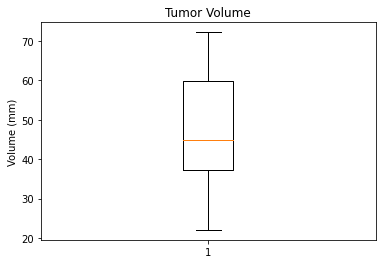

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Volume (mm)')
ax1.boxplot(vol_list)
plt.show()

## Line and Scatter Plots

C:\Users\toluw\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


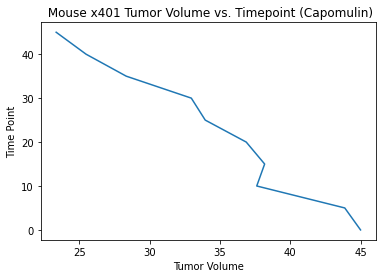

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
campomulin_name_cell = Capomulin.iloc[1]['Mouse ID']
capomulin_mice_x401 = mouse_data_unique[mouse_data_unique['Mouse ID']==campomulin_name_cell]
capomulin_mice_x401.loc[:,'Timepoint'] = capomulin_mice_x401.iloc[:,5].astype("float")
capomulin_mice_x401.loc[:,'Tumor Volume (mm3)'] = capomulin_mice_x401.iloc[:,6].astype("float")
weight_G = capomulin_mice_x401.loc[:,'Weight (g)']
time_point = capomulin_mice_x401.loc[:,'Timepoint']
tumor_volume = capomulin_mice_x401.loc[:,'Tumor Volume (mm3)']
plt.title(" Mouse x401 Tumor Volume vs. Timepoint (Capomulin)")
plt.ylabel("Time Point")
plt.xlabel("Tumor Volume")
plt.plot(tumor_volume,time_point)

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin.loc[:,'Tumor Volume (mm3)'] = Capomulin.iloc[:,6].astype("float")
Capomulin.loc[:,'Weight (g)'] = Capomulin.iloc[:,4].astype("int")
Capomulin_scatter = Capomulin.groupby(['Mouse ID','Weight (g)']).agg({'Tumor Volume (mm3)': ['mean']}).reset_index()
mouse_weight = (Capomulin_scatter.iloc[:,1])
tumor_vol_avr = (Capomulin_scatter.iloc[:,2])

C:\Users\toluw\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\toluw\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


The r-squared is: 0.7088568047708717


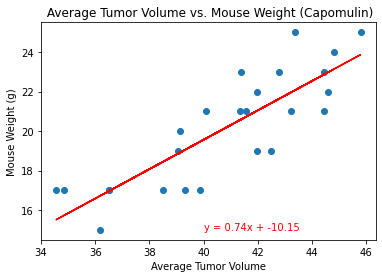

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_vol_avr, mouse_weight)
regress_values = tumor_vol_avr * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tumor_vol_avr,mouse_weight)
plt.plot(tumor_vol_avr,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=10,color="red")
plt.title(" Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,tumor_vol_avr)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The r-squared is: 0.7088568047708717
The correlation between both factors is 0.84
